## **1. Cluster the IRIS dataset using k-means algorithms.**

**a. Write your own code and do not use the inbuilt
functions.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
irisDataSet=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
irisDataSet.columns=['x1','x2','x3','x4','y']

irisData=irisDataSet.iloc[:,0:4]

irisData

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
class Cluster(object):
  def __init__(self,nodeIds,centroidNode):
    self.nodeIds=nodeIds
    self.centroidNode=centroidNode

In [ ]:
class KMeans(object):

  def __init__(self,dataSet,k):
    self.k=k
    self.dataSet=dataSet
    self.clusters=[(Cluster([],node))for node in self.dataSet.sample(n=self.k,random_state=81).to_numpy()]
    self.meanSqDevs=[]


  def Clustering(self):
    for cluster in self.clusters:
      cluster.nodeIds=[]
    for i,node in enumerate(self.dataSet.to_numpy()):
      minIndx,minD=self.MinDistanceCluster(node)
      self.clusters[minIndx].nodeIds.append(i)
      self.clusters[minIndx].centroidNode=self.UpdateCentroid(self.clusters[minIndx],node)
  
  def fit(self):
    for i in range(20):

      self.Clustering()
      self.meanSqDevs.append(self.AvgSqDev())




  def AvgSqDev(self):
    nodes=self.dataSet.to_numpy()
    stdDev=[]
    for cluster in self.clusters: 
      s=0.0
      for nodeId in cluster.nodeIds:
        s+=sum((nodes[nodeId]-cluster.centroidNode)**2)
      # s/=len(cluster.nodeIds)
      # s=(s)**0.5
      stdDev.append(s)
    return np.mean(stdDev)

  

  def UpdateCentroid(self,cluster,node):
    nodes=len(cluster.nodeIds)*np.array(cluster.centroidNode)+np.array(node) 
    centroid = nodes/(len(cluster.nodeIds)+1)
    return centroid

  def MinDistanceCluster(self,node):
    minD=1e9
    minIndx=1e9
    for i,cluster in enumerate(self.clusters):
      d=math.sqrt(sum((cluster.centroidNode-node)**2))
      if d <= minD:
        minD=d
        minIndx=i
    return int(minIndx),minD

**b. Choose the value of K using the Elbow method**

In [ ]:
#selection of k using elbow method

K=[1,2,3,4,5,6,7,8,9,10]


sqDev=[]
for k in K:
  _km=KMeans(irisData,k)
  _km.fit()
  sqDev.append(np.mean(_km.meanSqDevs))
sqDev

[680.8288927096489,
 77.51318636092014,
 26.954928420828793,
 14.590476735820712,
 10.151551487372515,
 8.204212422008036,
 5.403248270220006,
 4.541477499882683,
 3.845975069603586,
 3.42375781814125]

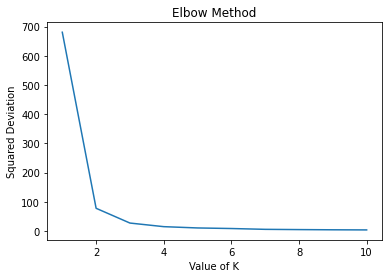

In [ ]:
plt.xlabel('Value of K')
plt.ylabel('Squared Deviation')
plt.title('Elbow Method')
plt.plot(K,sqDev)
plt.show()

    Now as depicted from above plot using the elbow method shows the optimal above value of k=3 for this dataset

In [ ]:
# So running K-Means for k=3 as depicted from above plot

km=KMeans(irisData,3)

km.fit()
km.meanSqDevs

[27.321219229551712,
 26.935949028578978,
 26.9356334916923,
 26.9356333334194,
 26.935633333333385,
 26.935633333333328,
 26.935633333333328,
 26.93563333333334,
 26.93563333333334,
 26.93563333333334,
 26.935633333333342,
 26.935633333333342,
 26.935633333333342,
 26.935633333333342,
 26.935633333333342,
 26.935633333333342,
 26.935633333333342,
 26.935633333333342,
 26.935633333333342,
 26.935633333333342]

In [ ]:
# nodes number of nodes included in each cluster

for i in km.clusters:
  print(i.nodeIds)

[77, 86, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 106, 113, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]


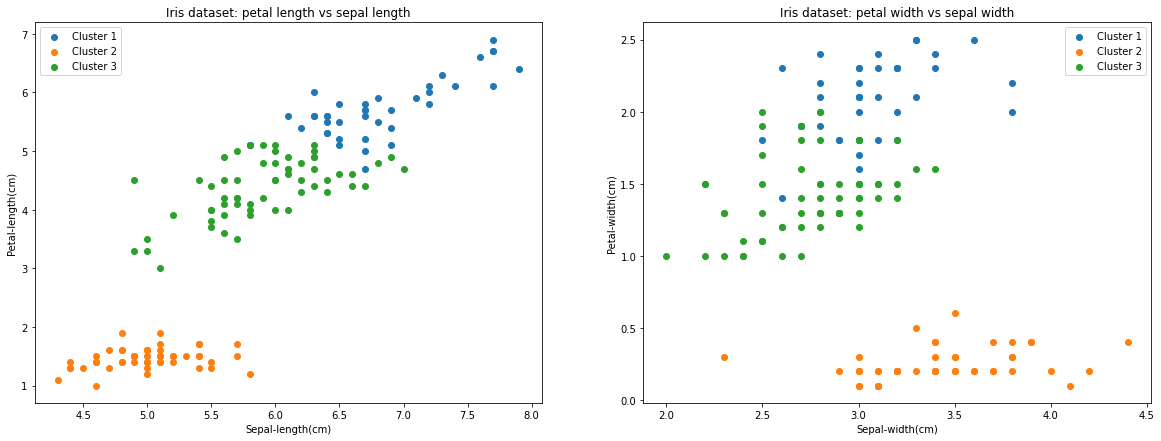

In [ ]:
# Plot of Classification of Iris DataSet as done by above wriiten code

iris=irisData.to_numpy()
fig,ax=plt.subplots(1,2,figsize=(20, 7))

label=['Cluster 1','Cluster 2','Cluster 3']

clusters=[]

for cluster in km.clusters:
  c=[]
  for nodeId in cluster.nodeIds:
    c.append(iris[nodeId])
  clusters.append(np.array(c))

for i,cluster in enumerate(clusters):
  ax[0].scatter(cluster[:,0:1],cluster[:,2:3],label=label[i])
ax[0].set_xlabel('Sepal-length(cm)')
ax[0].set_ylabel('Petal-length(cm)')
ax[0].set_title('Iris dataset: petal length vs sepal length')
ax[0].legend()

for i,cluster in enumerate(clusters):
  ax[1].scatter(cluster[:,1:2],cluster[:,3:4],label=label[i])
ax[1].set_xlabel('Sepal-width(cm)')
ax[1].set_ylabel('Petal-width(cm)')
ax[1].set_title('Iris dataset: petal width vs sepal width')
ax[1].legend()


fig.show()


**c. Repeat the experiments for k-means using library functions
and verify the earlier results.**

In [ ]:
#squared deviation run over 20 iterations

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=20, n_init=10, random_state=81)
    kmeans.fit(irisData.to_numpy())
    wcss.append(kmeans.inertia_)
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.51155576776165,
 29.914633449883453,
 28.164179988288687,
 26.484697845431544]

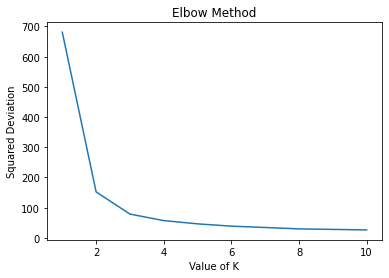

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('Squared Deviation')
plt.show()